In [247]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Data Loading and Quality checks

In [3]:
c_data=pd.read_csv("Country-data.csv")

In [4]:
c_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
print(c_data.info())
print(c_data.shape)
print(c_data.isnull().sum())
# Data seems to be not having any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB
None
(167, 10)
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


In [6]:
c_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


- No missing values 
- All the columns are rightly mapped to respective Data types
- No need of any Data Cleaning 

# EDA - Univariate Analysis

In [7]:
c_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


38.270059880239515


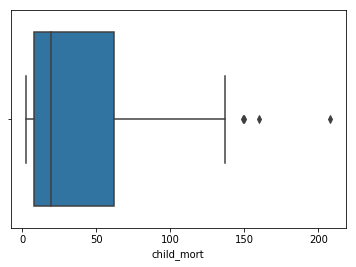

In [8]:
#mean of child mortality rate
print(c_data.child_mort.mean())
sns.boxplot(c_data["child_mort"])
plt.show()
#Box plot shows that though mean is 38.27 there are countries which have very high mortality rate

In [9]:
high_mortality=c_data[c_data["child_mort"]>c_data.child_mort.mean()]
print(len(high_mortality))
#out of 176 countries 57 countries have higher mortality rate than mean , lets focus on top 10 countries
#with higher mortality rate

57


In [10]:
t10_child_mort = high_mortality[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)

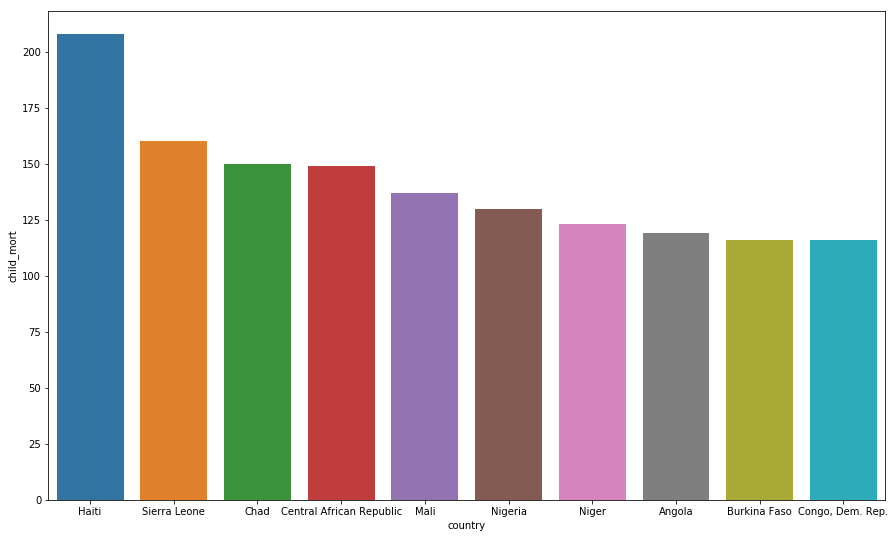

In [11]:
plt.figure(figsize=(15,9))
sns.barplot(x='country', y='child_mort', data= t10_child_mort)
plt.xlabel="country"
plt.ylabel= 'Child Mortality Rate'
plt.show()

- with Box plot analysis you can see there are outliers in child mortality
- The countries with high child mortality rate seems to be african countries
- we will deal with the outliers in outlier analysis section(marking child mortality rate)

41.1089760479042


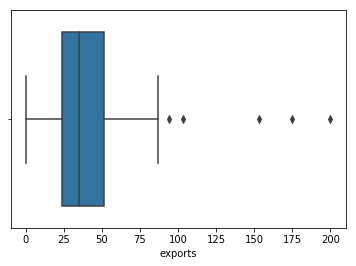

57


In [12]:
print(c_data.exports.mean())
sns.boxplot(c_data["exports"])
plt.show()
high_exports=c_data[c_data["exports"]>c_data.exports.mean()]
print(len(high_mortality))

In [13]:
top_exports = high_exports[['country','exports']].sort_values('exports', ascending = False).head(10)

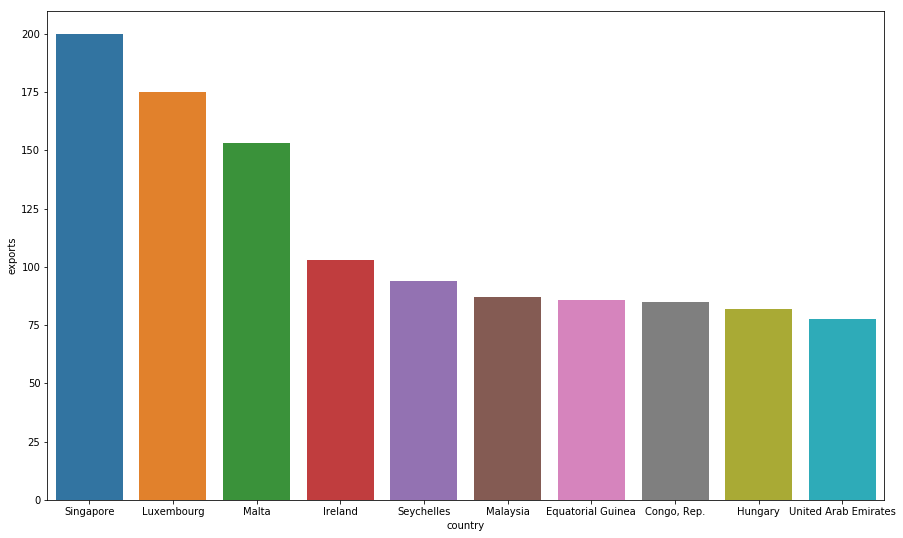

In [14]:
plt.figure(figsize=(15,9))
sns.barplot(x='country', y='exports', data= top_exports)
plt.xlabel="country"
plt.ylabel= 'exports'
plt.show()

- These countries with top exports and seems to be better economically when consideres generally
- These countries will act as outliers and we will deal with outliers in outlier analysis

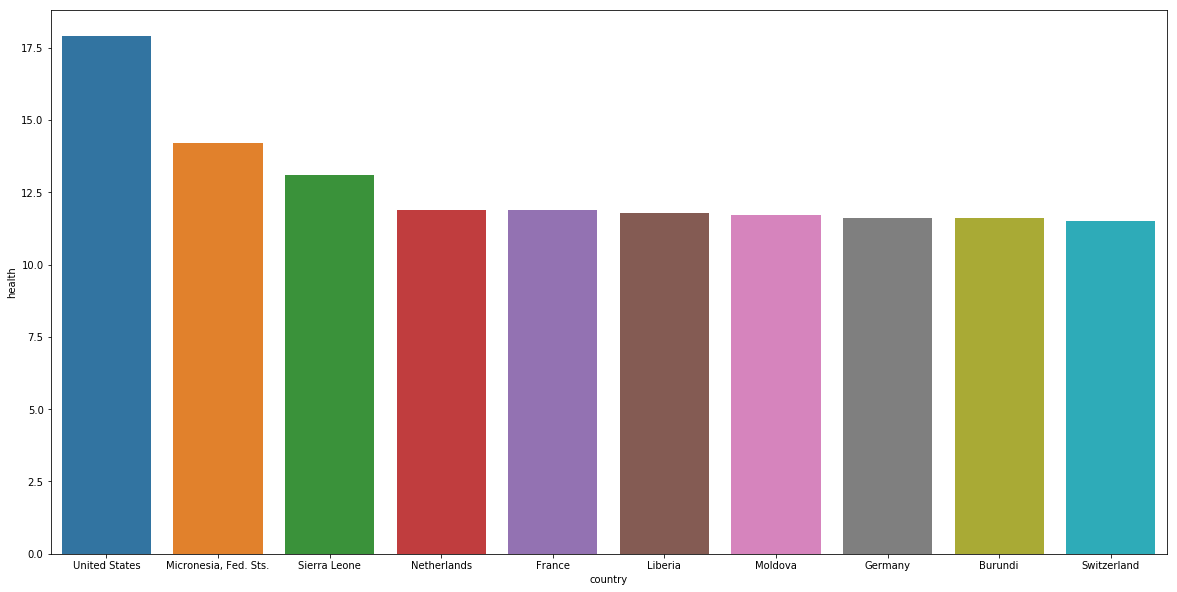

In [15]:
top_health = c_data[['country','health']].sort_values('health', ascending = False).head(10)
plt.figure(figsize=(20,10))
sns.barplot(x='country', y='health', data= top_health)
plt.xlabel="country"
plt.ylabel= 'health'
plt.show()

- These are the top countries which have good focus on the health of their people

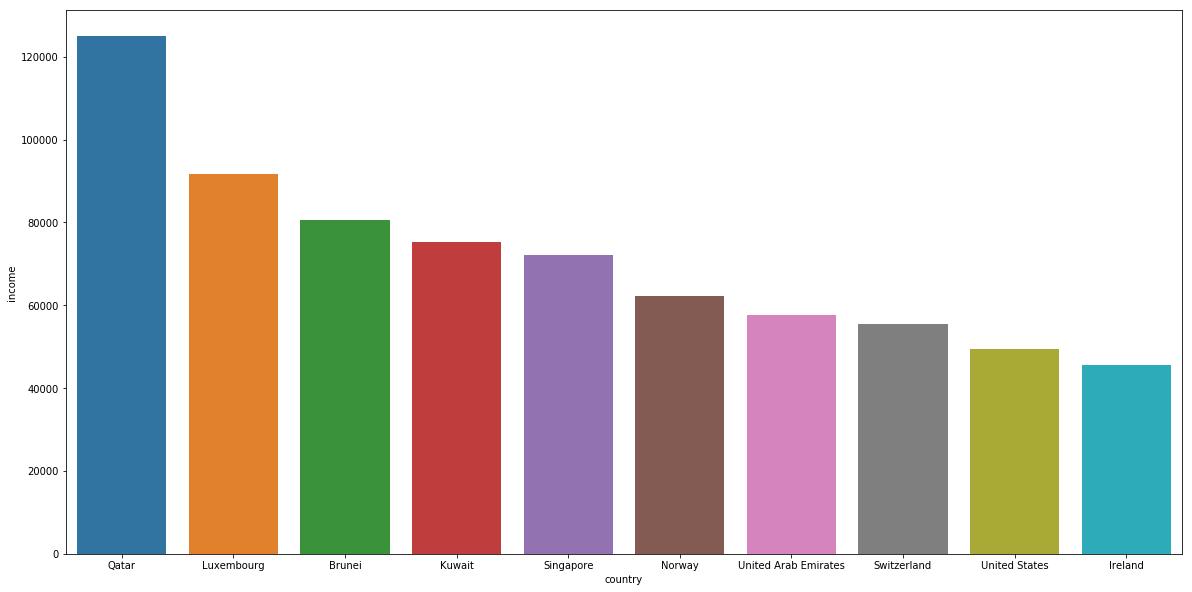

In [16]:
top_income = c_data[['country','income']].sort_values('income', ascending = False).head(10)
plt.figure(figsize=(20,10))
sns.barplot(x='country', y='income', data= top_income)
plt.xlabel="country"
plt.ylabel= 'income'
plt.show()

- Income per person is high for the developed nations

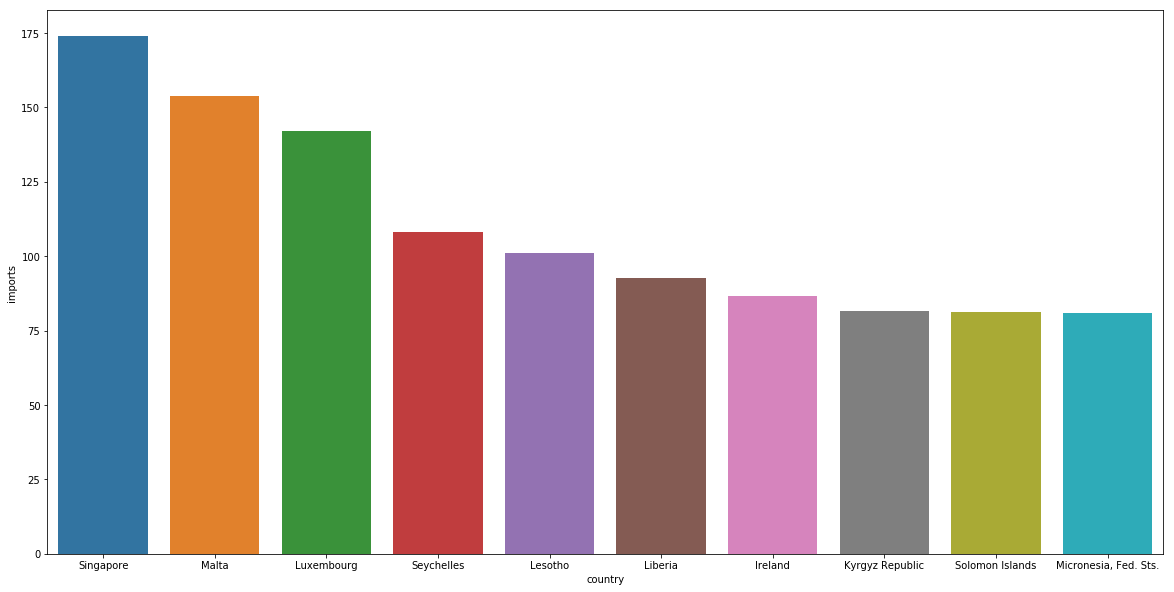

In [17]:
top_imports = c_data[['country','imports']].sort_values('imports', ascending = False).head(10)
plt.figure(figsize=(20,10))
sns.barplot(x='country', y='imports', data= top_imports)
plt.xlabel="country"
plt.ylabel= 'imports'
plt.show()

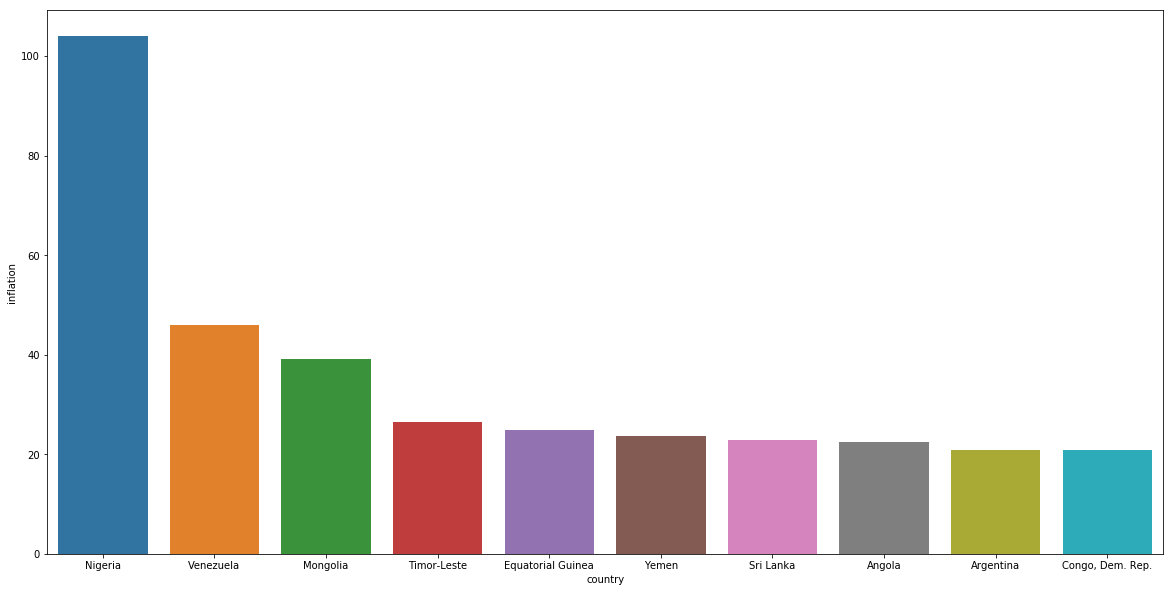

In [18]:
top_inflation = c_data[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt.figure(figsize=(20,10))
sns.barplot(x='country', y='inflation', data= top_inflation)
plt.xlabel="country"
plt.ylabel= 'inflation'
plt.show()

- Nigeria stands to be outlier as its inflation rate is very high compared to other countries

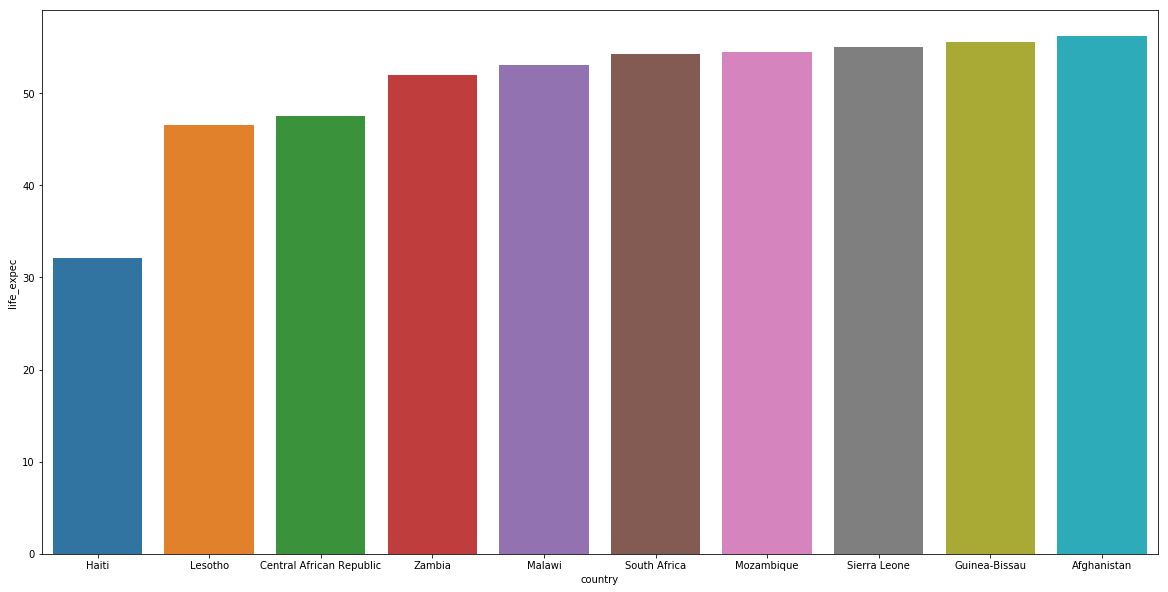

70.55568862275449


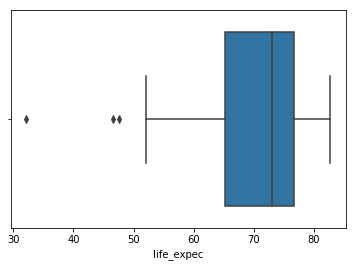

In [19]:
low_LE = c_data[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt.figure(figsize=(20,10))
sns.barplot(x='country', y='life_expec', data= low_LE)
plt.xlabel="country"
plt.ylabel= 'life_expec'
plt.show()
print(c_data.life_expec.mean())
sns.boxplot(c_data["life_expec"])
plt.show()

- Here for Life Expectancy we have plotted the countries which have low life expectency
- Haiti has very Low , This shows there should be sponsors for health in this country to improve health

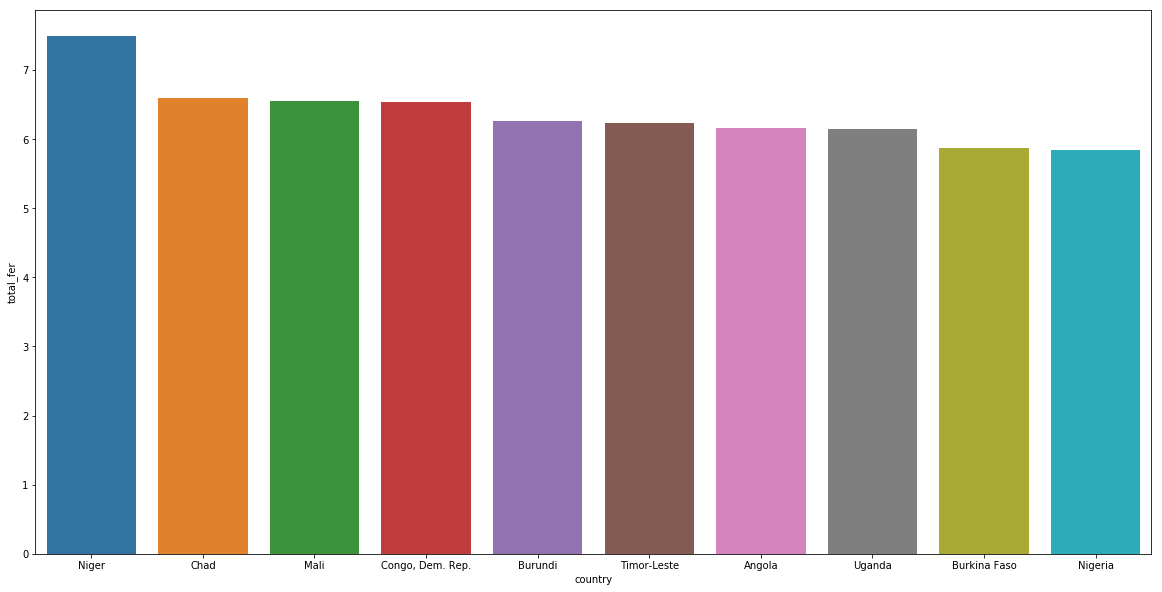

In [20]:


top_tf = c_data[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt.figure(figsize=(20,10))
sns.barplot(x='country', y='total_fer', data= top_tf)
plt.xlabel="country"
plt.ylabel= 'total_fer'
plt.show()

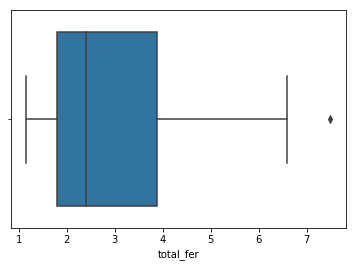

In [21]:
sns.boxplot(c_data["total_fer"])
plt.show()

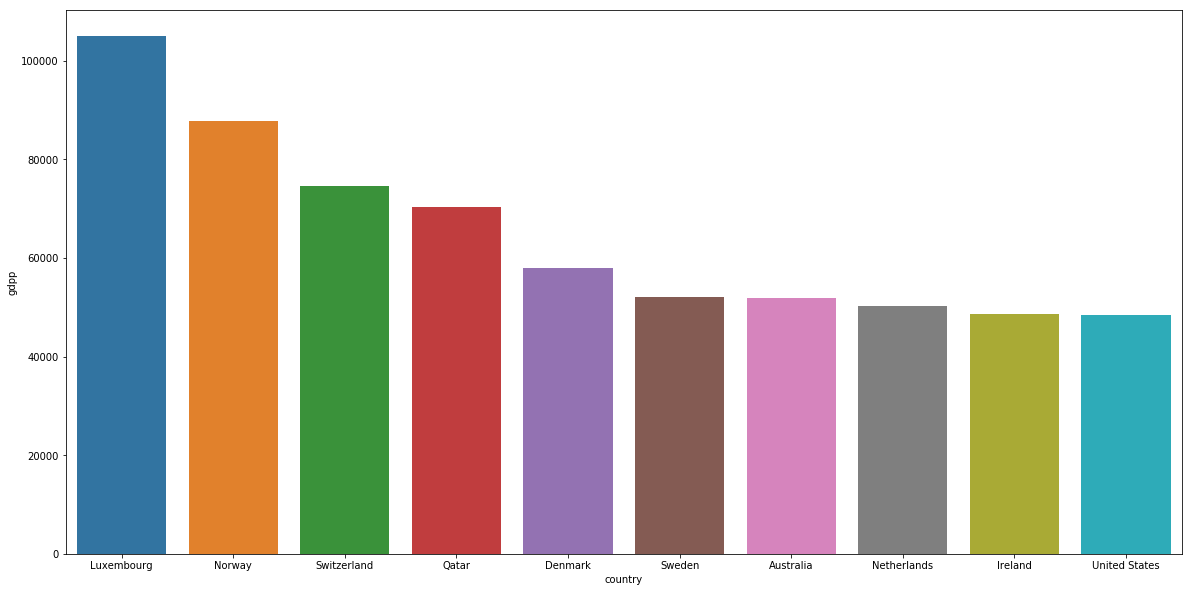

In [22]:

top_gdp = c_data[['country','gdpp']].sort_values('gdpp', ascending = False).head(10)
plt.figure(figsize=(20,10))
sns.barplot(x='country', y='gdpp', data= top_gdp)
plt.xlabel="country"
plt.ylabel= 'gdpp'
plt.show()

# Inferences from Univariate Analysis

- The countries with high child mortality rate seems to be african countries (Haiti stands top).
- Exports are high from developed Countries.
- Health is good in developed countries but top export countries are not same as top healthy countries. This shows some countries are strong economically and some countries are strong in health.
- Many of the Developed countries are with high imports, high exports and total income (they might not top on all three categories.
- Nigeria has very high inflation compared to any other country.
- Haiti has very low life expectancy , this is similar in lines with child mortality rate ,shows  health is very poor in this country.
- Luxembourg has very good GDP compared to other top developed, developing countries

# EDA - Multi-Variate Analysis

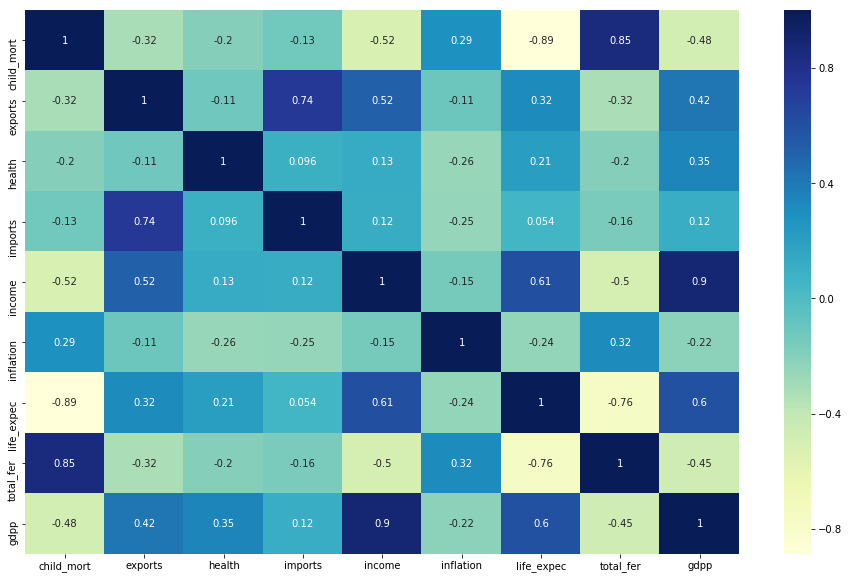

In [23]:
plt.figure(figsize = (16, 10))
sns.heatmap(c_data.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [24]:
# Since the data is not categorical Correlation matrix can give inferences for Multi-Variate Analysi

# Inferences from Heat-Map

- Child Mortality is highly correlated with Total fertility , this shows the number of children can be born is high but the child surviving rate is very low and also life expetancy is inversely proportional, this shows that in these countries (may be people are giving birth to lots of children considering the child will not survive for many days, leading to give birth for many children)

- Exports and imports are highly correlated , these countries with high exports have good life expectancy ,income for their people and good GDP  (economically these are strong countries)

- Countries with people who have high incomes spend good amount of money on health 

- The countries with high imports are negatively correlated with inflation

- Income is highly correlated with Life expectancy of the population.

- Inflation is negatively correlated with gdpp

- The countries with high tot_fer are inversely proportion to income, exports , imports, inflation and gdpp

- GDP and income are highly correlated

# Scope - Deriving from existing columns

- From the few ivestigations done , actual growth rate of a country is Real GDP which will consider inflation into the account , Here we are given GDPP , to find Real GDPP we need to remove inflation effect from GDPP

- For any country if exports are greater than imports it is favourable for economy of the country but again it depends on currency value of the country, so with the present data we have , we cannot use net export as variable as it depends on currency value of that country with respect to dollar

###### Deriving Real GDPP

In [25]:
c_data["rgdpp"]=c_data["gdpp"]*((100-c_data["inflation"])/100)

In [26]:
c_data.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,rgdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,500.7968
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,3906.3590
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,3741.9400
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,2739.2800
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,12024.3200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,8147.3000
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,2969.8060
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,51297.9600
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,46490.5630
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,5034.0800


In [27]:
#now since we bought effect of inflation and gdpp in real gdpp (rgdpp), we can drop both the columns
c_data=c_data.drop(["inflation","gdpp"],axis=1).copy()
c_data.head()

,country,child_mort,exports,health,imports,income,life_expec,total_fer,rgdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,56.2,5.82,500.7968
1,Albania,16.6,28.0,6.55,48.6,9930,76.3,1.65,3906.3590
2,Algeria,27.3,38.4,4.17,31.4,12900,76.5,2.89,3741.9400
3,Angola,119.0,62.3,2.85,42.9,5900,60.1,6.16,2739.2800
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,76.8,2.13,12024.3200


# Outlier Analysis

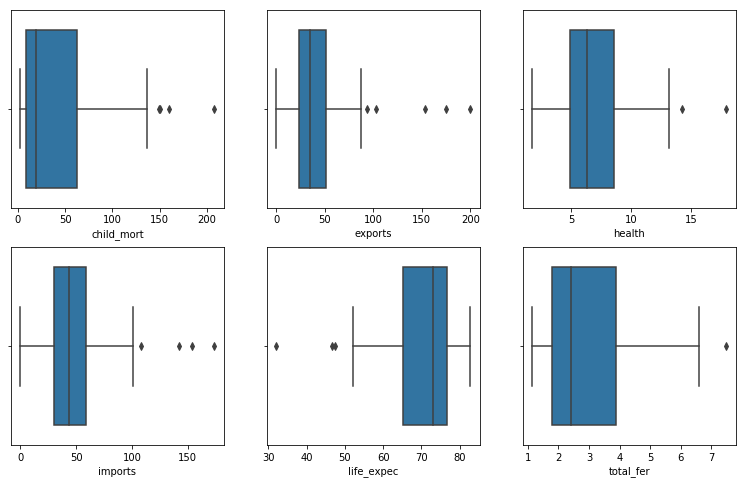

In [28]:
plt.figure(figsize=(13,8))
plt.subplot(231)
sns.boxplot(c_data['child_mort'])
plt.subplot(232)
sns.boxplot(c_data['exports'])
plt.subplot(233)
sns.boxplot(c_data['health'])
plt.subplot(234)
sns.boxplot(c_data['imports'])
plt.subplot(235)
sns.boxplot(c_data['life_expec'])
plt.subplot(236)
sns.boxplot(c_data['total_fer'])
plt.show()

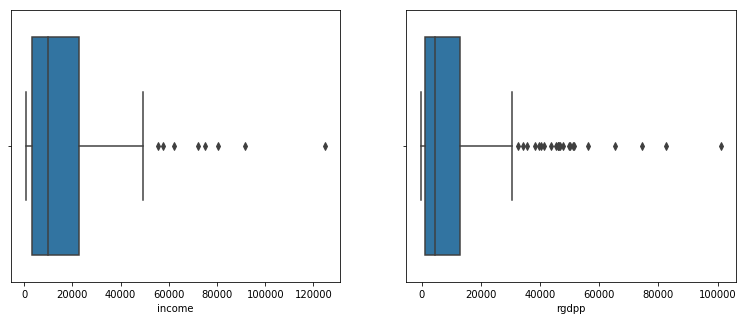

In [29]:
plt.figure(figsize=(13,5))
plt.subplot(121)
sns.boxplot(c_data['income'])
plt.subplot(122)
sns.boxplot(c_data['rgdpp'])
plt.show()

In [30]:
# There are lot of outliers in all columns , we will handle them
c_data_backup=c_data.copy()

In [31]:
Q1 = c_data['child_mort'].quantile(0.05)
Q3 = c_data['child_mort'].quantile(0.95)
IQR = Q3 - Q1
c_data =  c_data[(c_data['child_mort'] >= Q1) & (c_data['child_mort']<= Q3)]
print(c_data.shape)


(150, 9)


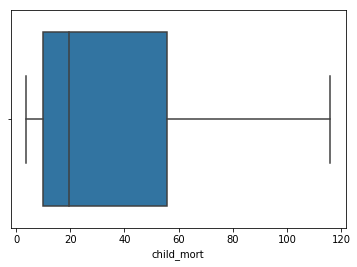

In [32]:
sns.boxplot(c_data['child_mort'])

In [33]:
# With what we have done we are missing lot of countries which have high child mortality rate  and our model will be bad
# instead of removing the outliers we will replace their values with some methodology thereby preserving data and removing outliers

In [34]:
c_data=c_data_backup.copy()
c_data.shape

(167, 9)

In [35]:
c_data['child_mort'][c_data['child_mort'] <=Q1] = Q1
c_data['child_mort'][c_data['child_mort'] >Q3] = Q3
c_data.shape

C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(167, 9)

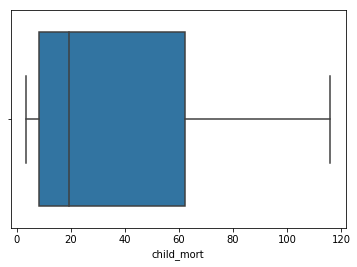

In [36]:
sns.boxplot(c_data['child_mort'])

- you can see in bar graph outliers are addressed for child mortality rate and also data is preserved for analysis 
- Lets follow this approach for other columns also as in our case study those outliers are very important and on the other hand model should not be skewed , so we will go with this approach


In [37]:
Q1 = c_data['exports'].quantile(0.05)
Q3 = c_data['exports'].quantile(0.95)
c_data['exports'][c_data['exports'] <=Q1] = Q1
c_data['exports'][c_data['exports'] >Q3] = Q3
c_data.shape
#sns.boxplot(c_data['exports'])

C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(167, 9)

In [38]:
Q1 = c_data['health'].quantile(0.05)
Q3 = c_data['health'].quantile(0.95)
c_data['health'][c_data['health'] <=Q1] = Q1
c_data['health'][c_data['health'] >Q3] = Q3
c_data.shape
#sns.boxplot(c_data['health'])

C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(167, 9)

In [39]:
Q1 = c_data['imports'].quantile(0.05)
Q3 = c_data['imports'].quantile(0.95)
c_data['imports'][c_data['imports'] <=Q1] = Q1
c_data['imports'][c_data['imports'] >Q3] = Q3
c_data.shape
#sns.boxplot(c_data['imports'])

C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(167, 9)

In [40]:
Q1 = c_data['income'].quantile(0.05)
Q3 = c_data['income'].quantile(0.95)
c_data['income'][c_data['income'] <=Q1] = Q1
c_data['income'][c_data['income'] >Q3] = Q3
c_data.shape
#sns.boxplot(c_data['income'])

C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(167, 9)

In [41]:
Q1 = c_data['life_expec'].quantile(0.05)
Q3 = c_data['life_expec'].quantile(0.95)
c_data['life_expec'][c_data['life_expec'] <=Q1] = Q1
c_data['life_expec'][c_data['life_expec'] >Q3] = Q3
c_data.shape
#sns.boxplot(c_data['life_expec'])

C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(167, 9)

In [42]:
Q1 = c_data['total_fer'].quantile(0.05)
Q3 = c_data['total_fer'].quantile(0.95)
c_data['total_fer'][c_data['total_fer'] <=Q1] = Q1
c_data['total_fer'][c_data['total_fer'] >Q3] = Q3
c_data.shape
 

C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


(167, 9)

In [43]:
Q1 = c_data['rgdpp'].quantile(0.05)
Q3 = c_data['rgdpp'].quantile(0.85)
print(Q3)
c_data['rgdpp'][c_data['rgdpp'] <=Q1] =  Q1
c_data['rgdpp'][c_data['rgdpp'] >= Q3] =  Q3
print(c_data.shape)
 

C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


30225.327999999994
(167, 9)


C:\Users\sairajes\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


######  After the addressing outliers , lets see how data looks 

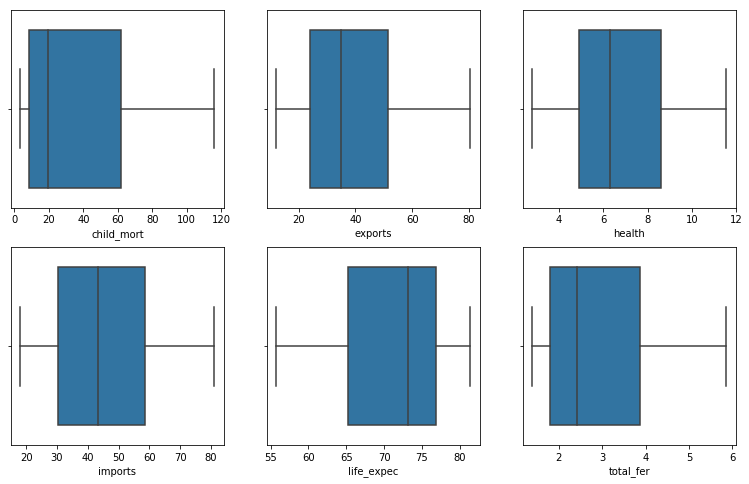

In [44]:
plt.figure(figsize=(13,8))
plt.subplot(231)
sns.boxplot(c_data['child_mort'])
plt.subplot(232)
sns.boxplot(c_data['exports'])
plt.subplot(233)
sns.boxplot(c_data['health'])
plt.subplot(234)
sns.boxplot(c_data['imports'])
plt.subplot(235)
sns.boxplot(c_data['life_expec'])
plt.subplot(236)
sns.boxplot(c_data['total_fer'])
plt.show()

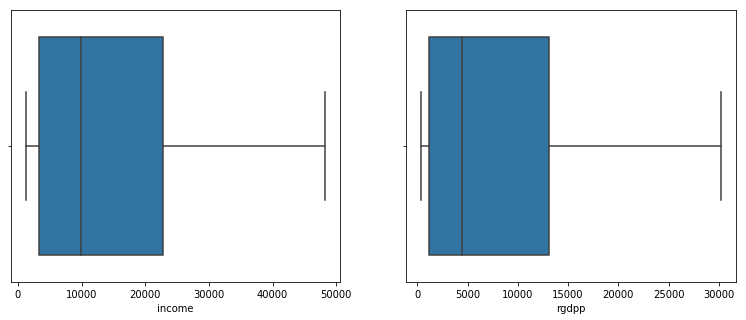

In [45]:
plt.figure(figsize=(13,5))
plt.subplot(121)
sns.boxplot(c_data['income'])
plt.subplot(122)
sns.boxplot(c_data['rgdpp'])
plt.show()

In [46]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
rgdpp         167 non-null float64
dtypes: float64(8), object(1)
memory usage: 11.8+ KB


- We can proceed with the next steps of scaling and model building , All the data (quality, types, cleaning, deriving, outliers) are addressed

- There is no need to create any dummy variables as there are no categorical variables except countries column which we need to segment them

In [47]:
c_data_backup_2=c_data.copy()

# instantiate
scaler = StandardScaler()
c_data.columns[1:]
c_data_scaled=c_data.copy()

# fit_transform
c_data_scaled[c_data.columns[1:]] = scaler.fit_transform(c_data_scaled[c_data.columns[1:]])
c_data_scaled.shape

(167, 9)

In [52]:
c_data_scaled=c_data_scaled.drop(["country"],axis=1)
c_data_scaled.head()

,child_mort,exports,health,imports,income,life_expec,total_fer,rgdpp
0,1.479588,-1.371444,0.322232,-0.025440,-0.960575,-1.825310,2.020718,-0.844903
1,-0.560024,-0.570493,-0.086218,0.177314,-0.395590,0.682454,-0.887331,-0.527360
2,-0.263504,-0.045941,-1.030017,-0.765221,-0.193907,0.707406,-0.022587,-0.542691
3,2.194560,1.159521,-1.553469,-0.135037,-0.669255,-1.338729,2.049310,-0.636181
4,-0.734610,0.312167,-0.292427,0.741740,0.227115,0.744836,-0.552591,0.229579


# K-Means Clustering

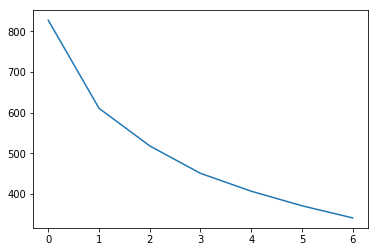

In [53]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(c_data_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [54]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(c_data_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(c_data_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.31637873370893016
For n_clusters=3, the silhouette score is 0.3130674721388808
For n_clusters=4, the silhouette score is 0.2826439038412522
For n_clusters=5, the silhouette score is 0.2877916481279434
For n_clusters=6, the silhouette score is 0.2737536162446207
For n_clusters=7, the silhouette score is 0.28730088100822404
For n_clusters=8, the silhouette score is 0.2835883599192547


- Both the Elbow curve and silhouette analysis is suggesting 2 clusters or 3 clusters
- We can divide the countries based on which countries need aid and which countries does not need , but if we divide in this way it would be difficult for NGO to choose the top countries which needed aid
- Considering Business aspects we can divide into 3 clusters which are under-developed(badly needed aid),Developing Countries (Priority-2 , who can manage but they can be better if provided aid), Developed Countries (Priority-3 Who can mange themselves)
- Below we will try with 4 clusters also , just to check if 3 and 4 clusters show big difference

In [92]:
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(c_data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [93]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 1, 0, 0, 2, 2, 0,
       2, 0, 1, 2, 0, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0,
       1, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0,
       2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [94]:
c_data['cluster_id'] = kmeans.labels_
c_data

,country,child_mort,exports,health,imports,income,life_expec,total_fer,rgdpp,cluster_id
0,Afghanistan,90.20,12.12,7.580,44.90,1610.0,56.20,5.820,500.7968,2
1,Albania,16.60,28.00,6.550,48.60,9930.0,76.30,1.650,3906.3590,0
2,Algeria,27.30,38.40,4.170,31.40,12900.0,76.50,2.890,3741.9400,0
3,Angola,116.00,62.30,2.850,42.90,5900.0,60.10,5.861,2739.2800,2
4,Antigua and Barbuda,10.30,45.50,6.030,58.90,19100.0,76.80,2.130,12024.3200,0
5,Argentina,14.50,18.90,8.100,18.13,18700.0,75.80,2.370,8147.3000,0
6,Armenia,18.10,20.80,4.400,45.30,6700.0,73.30,1.690,2969.8060,0
7,Australia,4.80,19.80,8.730,20.90,41400.0,81.40,1.930,30225.3280,1
8,Austria,4.30,51.30,11.000,47.80,43200.0,80.50,1.440,30225.3280,1
9,Azerbaijan,39.20,54.30,5.880,20.70,16000.0,69.10,1.920,5034.0800,0


In [97]:
print(len(c_data[c_data["cluster_id"]==2]))
c_data[c_data["cluster_id"]==2]

50


,country,child_mort,exports,health,imports,income,life_expec,total_fer,rgdpp,cluster_id
0,Afghanistan,90.2,12.12,7.580,44.90,1610.0,56.20,5.820,500.7968,2
3,Angola,116.0,62.30,2.850,42.90,5900.0,60.10,5.861,2739.2800,2
17,Benin,111.0,23.80,4.100,37.20,1820.0,61.80,5.360,751.2917,2
21,Botswana,52.5,43.60,8.300,51.30,13300.0,57.10,2.880,5783.5800,2
25,Burkina Faso,116.0,19.20,6.740,29.60,1430.0,57.90,5.861,535.8425,2
26,Burundi,93.6,12.12,11.570,39.20,1213.0,57.70,5.861,410.2491,2
28,Cameroon,108.0,22.20,5.130,27.00,2660.0,57.30,5.110,1284.9790,2
31,Central African Republic,116.0,12.12,3.980,26.50,1213.0,55.78,5.210,437.0354,2
32,Chad,116.0,36.80,4.530,43.50,1930.0,56.50,5.861,839.6817,2
36,Comoros,88.2,16.50,4.510,51.70,1410.0,65.90,4.750,739.2397,2


In [99]:
# The countries with cluster id 2 are considered as highly under-developed countries and required aid badly , there are 50
#countries in this category

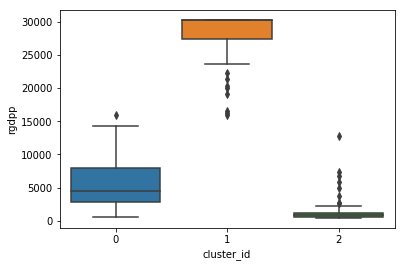

In [100]:
sns.boxplot(x='cluster_id', y='rgdpp', data=c_data)

- we can observe that there is a big difference in rgdpp between these three clusters and as expected cluster 2 (under-Developed Countries have low rgdpp)

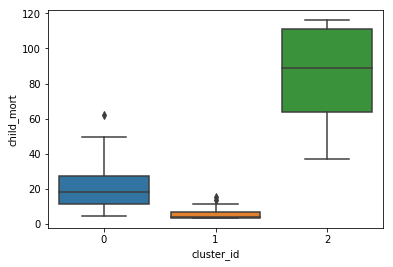

In [101]:
sns.boxplot(x='cluster_id', y='child_mort', data=c_data)

- As expected child mortality rate is high for under-Developed countries with cluster-id 2

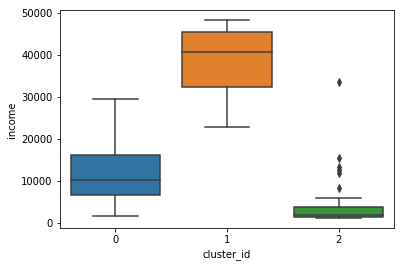

In [102]:
sns.boxplot(x='cluster_id', y='income', data=c_data)

-  As expected income is low for under-Developed countries with cluster-id 2

# Hierarchical Clustering

In [103]:
c_data_scaled.head()

,child_mort,exports,health,imports,income,life_expec,total_fer,rgdpp
0,1.479588,-1.371444,0.322232,-0.025440,-0.960575,-1.825310,2.020718,-0.844903
1,-0.560024,-0.570493,-0.086218,0.177314,-0.395590,0.682454,-0.887331,-0.527360
2,-0.263504,-0.045941,-1.030017,-0.765221,-0.193907,0.707406,-0.022587,-0.542691
3,2.194560,1.159521,-1.553469,-0.135037,-0.669255,-1.338729,2.049310,-0.636181
4,-0.734610,0.312167,-0.292427,0.741740,0.227115,0.744836,-0.552591,0.229579


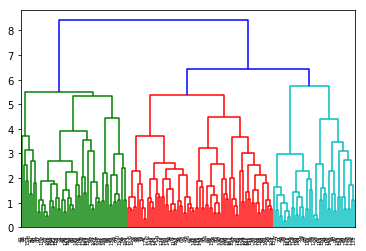

In [105]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

mergings = linkage(c_data_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [192]:
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 2, 3, 0, 1, 1, 3, 1, 0, 1, 1, 1, 1,
       1, 3, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 3, 3,
       2, 1, 1, 0, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 3, 2, 0, 1, 1, 0, 3, 2, 2, 1, 2, 1, 1, 0, 0, 3, 1, 0, 1, 1, 0,
       0, 3, 1, 3, 1, 0, 0, 1, 1, 0, 3, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       3, 2, 0, 0, 2, 3, 0, 1, 1, 1, 1, 1, 2, 3, 1, 1, 0, 1, 3, 0, 1, 1,
       0, 3, 3, 3, 1, 0, 3, 2, 1, 1, 0, 1, 2, 3, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 3, 2, 2, 1, 0, 1, 1, 1, 0, 0])

In [193]:
c_data['h_cluster_labels'] = cluster_labels
c_data.head()

,country,child_mort,exports,health,imports,income,life_expec,total_fer,rgdpp,h_cluster_labels,k_cluster_labels
0,Afghanistan,90.2,12.12,7.58,44.9,1610.0,56.2,5.820,500.7968,0,0
1,Albania,16.6,28.00,6.55,48.6,9930.0,76.3,1.650,3906.3590,1,3
2,Algeria,27.3,38.40,4.17,31.4,12900.0,76.5,2.890,3741.9400,1,3
3,Angola,116.0,62.30,2.85,42.9,5900.0,60.1,5.861,2739.2800,0,0
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100.0,76.8,2.130,12024.3200,1,2


In [194]:
print(len(c_data[c_data["h_cluster_labels"]==0]))
c_data[c_data["h_cluster_labels"]==0]

53


,country,child_mort,exports,health,imports,income,life_expec,total_fer,rgdpp,h_cluster_labels,k_cluster_labels
0,Afghanistan,90.2,12.12,7.580,44.90,1610.0,56.20,5.820,500.7968,0,0
3,Angola,116.0,62.30,2.850,42.90,5900.0,60.10,5.861,2739.2800,0,0
12,Bangladesh,49.4,16.00,3.520,21.80,2440.0,70.40,2.330,703.8788,0,3
17,Benin,111.0,23.80,4.100,37.20,1820.0,61.80,5.360,751.2917,0,0
25,Burkina Faso,116.0,19.20,6.740,29.60,1430.0,57.90,5.861,535.8425,0,0
26,Burundi,93.6,12.12,11.570,39.20,1213.0,57.70,5.861,410.2491,0,0
28,Cameroon,108.0,22.20,5.130,27.00,2660.0,57.30,5.110,1284.9790,0,0
31,Central African Republic,116.0,12.12,3.980,26.50,1213.0,55.78,5.210,437.0354,0,0
32,Chad,116.0,36.80,4.530,43.50,1930.0,56.50,5.861,839.6817,0,0
36,Comoros,88.2,16.50,4.510,51.70,1410.0,65.90,4.750,739.2397,0,0


In [195]:
# With Hierarchical Clustering, we are able to identify 45 countries as highly under-developed countries

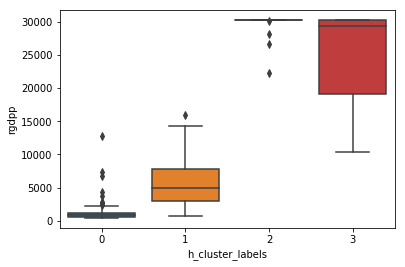

In [196]:
sns.boxplot(x="h_cluster_labels", y='rgdpp', data=c_data)

-  we can observe that there is a big difference in rgdpp between the clusters and as expected cluster 0 (under-Developed Countries have low rgdpp)

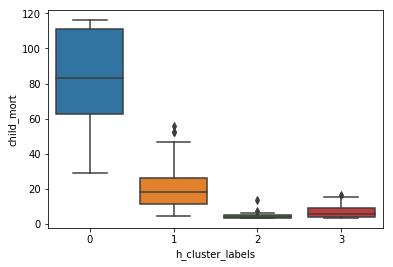

In [197]:
sns.boxplot(x="h_cluster_labels", y='child_mort', data=c_data)

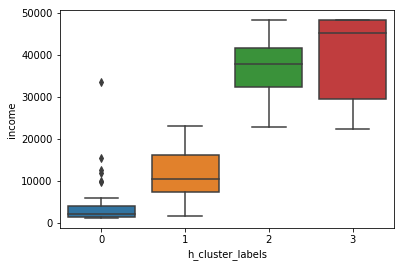

In [198]:
sns.boxplot(x="h_cluster_labels", y='income', data=c_data)

- With 4 clusters we observe that the child_mort is almost similar for cluster 0 and cluster 2 but gdpp and income is showing significant difference

- we can observe that there is a big difference in income between the clusters and as expected cluster 0 (under-Developed Countries have low rgdpp)

# Since we have used 4 clusters in Hierarichal , lets check with 4 clusters in K means if both are goving similar number of countries

In [219]:
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(c_data_scaled)
c_data['k_cluster_labels'] = kmeans.labels_
c_data.head()

,country,child_mort,exports,health,imports,income,life_expec,total_fer,rgdpp,h_cluster_labels,k_cluster_labels
0,Afghanistan,90.2,12.12,7.58,44.9,1610.0,56.2,5.820,500.7968,0,2
1,Albania,16.6,28.00,6.55,48.6,9930.0,76.3,1.650,3906.3590,1,0
2,Algeria,27.3,38.40,4.17,31.4,12900.0,76.5,2.890,3741.9400,1,0
3,Angola,116.0,62.30,2.85,42.9,5900.0,60.1,5.861,2739.2800,0,2
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100.0,76.8,2.130,12024.3200,1,3


In [220]:
print(len(c_data[c_data["k_cluster_labels"]==2]))
c_data[c_data["k_cluster_labels"]==2]

46


,country,child_mort,exports,health,imports,income,life_expec,total_fer,rgdpp,h_cluster_labels,k_cluster_labels
0,Afghanistan,90.2,12.12,7.580,44.90,1610.0,56.20,5.820,500.7968,0,2
3,Angola,116.0,62.30,2.850,42.90,5900.0,60.10,5.861,2739.2800,0,2
17,Benin,111.0,23.80,4.100,37.20,1820.0,61.80,5.360,751.2917,0,2
21,Botswana,52.5,43.60,8.300,51.30,13300.0,57.10,2.880,5783.5800,1,2
25,Burkina Faso,116.0,19.20,6.740,29.60,1430.0,57.90,5.861,535.8425,0,2
26,Burundi,93.6,12.12,11.570,39.20,1213.0,57.70,5.861,410.2491,0,2
28,Cameroon,108.0,22.20,5.130,27.00,2660.0,57.30,5.110,1284.9790,0,2
31,Central African Republic,116.0,12.12,3.980,26.50,1213.0,55.78,5.210,437.0354,0,2
32,Chad,116.0,36.80,4.530,43.50,1930.0,56.50,5.861,839.6817,0,2
36,Comoros,88.2,16.50,4.510,51.70,1410.0,65.90,4.750,739.2397,0,2


In [205]:
# The number of countries from both the methods are similar but there might be few countries falling into
# different clusters , as you can see 9 countries fell into different clusters from k means to hierarichal

In [222]:
print(len(c_data[(c_data["k_cluster_labels"]==2 ) & (c_data["h_cluster_labels"]==0)]))
countries=c_data[(c_data["k_cluster_labels"]==2 ) & (c_data["h_cluster_labels"]==0)]
print(countries['country'])

44
0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
112                       Niger
113  

- When you consider both models output we can report 44 countries back to CEO as the countries which needed aid (using the classification outputs from both the models)

In [223]:
c_data.head()

,country,child_mort,exports,health,imports,income,life_expec,total_fer,rgdpp,h_cluster_labels,k_cluster_labels
0,Afghanistan,90.2,12.12,7.58,44.9,1610.0,56.2,5.820,500.7968,0,2
1,Albania,16.6,28.00,6.55,48.6,9930.0,76.3,1.650,3906.3590,1,0
2,Algeria,27.3,38.40,4.17,31.4,12900.0,76.5,2.890,3741.9400,1,0
3,Angola,116.0,62.30,2.85,42.9,5900.0,60.1,5.861,2739.2800,0,2
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100.0,76.8,2.130,12024.3200,1,3


In [225]:
# dropping cluster_id column 
c_data=c_data.drop("cluster_id",axis=1)
c_data.head()

,country,child_mort,exports,health,imports,income,life_expec,total_fer,rgdpp,h_cluster_labels,k_cluster_labels
0,Afghanistan,90.2,12.12,7.58,44.9,1610.0,56.2,5.820,500.7968,0,2
1,Albania,16.6,28.00,6.55,48.6,9930.0,76.3,1.650,3906.3590,1,0
2,Algeria,27.3,38.40,4.17,31.4,12900.0,76.5,2.890,3741.9400,1,0
3,Angola,116.0,62.30,2.85,42.9,5900.0,60.1,5.861,2739.2800,0,2
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100.0,76.8,2.130,12024.3200,1,3


In [154]:
# we will visualise with k_cluster_labels

In [210]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
country             167 non-null object
child_mort          167 non-null float64
exports             167 non-null float64
health              167 non-null float64
imports             167 non-null float64
income              167 non-null float64
life_expec          167 non-null float64
total_fer           167 non-null float64
rgdpp               167 non-null float64
h_cluster_labels    167 non-null int32
k_cluster_labels    167 non-null int32
dtypes: float64(8), int32(2), object(1)
memory usage: 13.1+ KB


In [211]:
# converted the cluster_labels to categories , this will help us in visuaization
c_data['k_cluster_labels'] = c_data['k_cluster_labels'].astype("category")
c_data['h_cluster_labels'] = c_data['h_cluster_labels'].astype("category")

# Visualization

In [212]:
c_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
country             167 non-null object
child_mort          167 non-null float64
exports             167 non-null float64
health              167 non-null float64
imports             167 non-null float64
income              167 non-null float64
life_expec          167 non-null float64
total_fer           167 non-null float64
rgdpp               167 non-null float64
h_cluster_labels    167 non-null category
k_cluster_labels    167 non-null category
dtypes: category(2), float64(8), object(1)
memory usage: 12.5+ KB


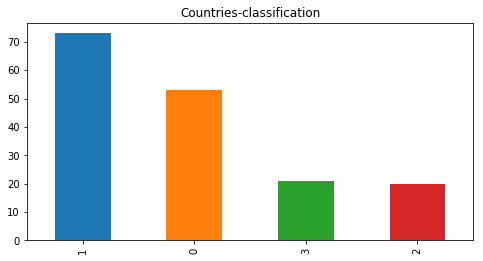

In [215]:
plt.figure(figsize=(8,4))
plt.title('Countries-classification')
plt.ylabel="Number-of-Countries"
plt.xlabel='- cluster 0 - under-Developed (priority),  cluster 2 - under-Developed , Cluster 1 - Developing ,Cluster 3 - Developed'
c_data["h_cluster_labels"].value_counts().plot.bar()
plt.show()

- cluster 0 - under-Developed (priority)

- cluster 1 - Developing  

- Cluster 1 - Developing-developed

- Cluster 3 - Developed

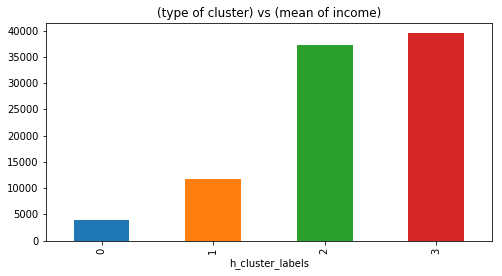

In [230]:
plt.figure(figsize=(8,4))
plt.title('(type of cluster) vs (mean of income)')
c_data.groupby("h_cluster_labels")["income"].mean().plot.bar()
plt.show()

- cluster 0 - under-Developed (priority)

- cluster 1 - Developing  

- Cluster 1 - Developing-developed

- Cluster 3 - Developed

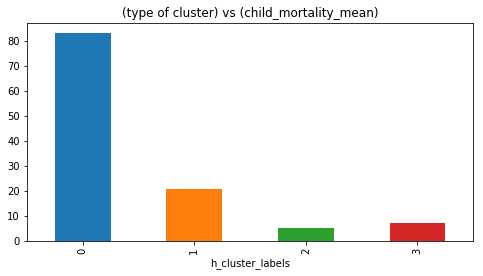

In [231]:
plt.figure(figsize=(8,4))
plt.title('(type of cluster) vs (child_mortality_mean)')
c_data.groupby("h_cluster_labels")["child_mort"].mean().plot.bar()
plt.show()

- cluster 0 - under-Developed (priority)

- cluster 1 - Developing  

- Cluster 1 - Developing-developed

- Cluster 3 - Developed

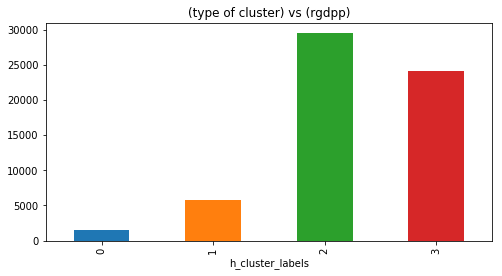

In [234]:
plt.figure(figsize=(8,4))
plt.title('(type of cluster) vs (rgdpp)')
c_data.groupby("h_cluster_labels")["rgdpp"].mean().plot.bar()
plt.show()

- The rdpp for developing nations is high compared to developed nations , this is exected because the rate of growth of gdp is high for those nations because they are trying to develope , whereas the developed nations will not have rate of growth as of developing nations (Ex: US vs India)

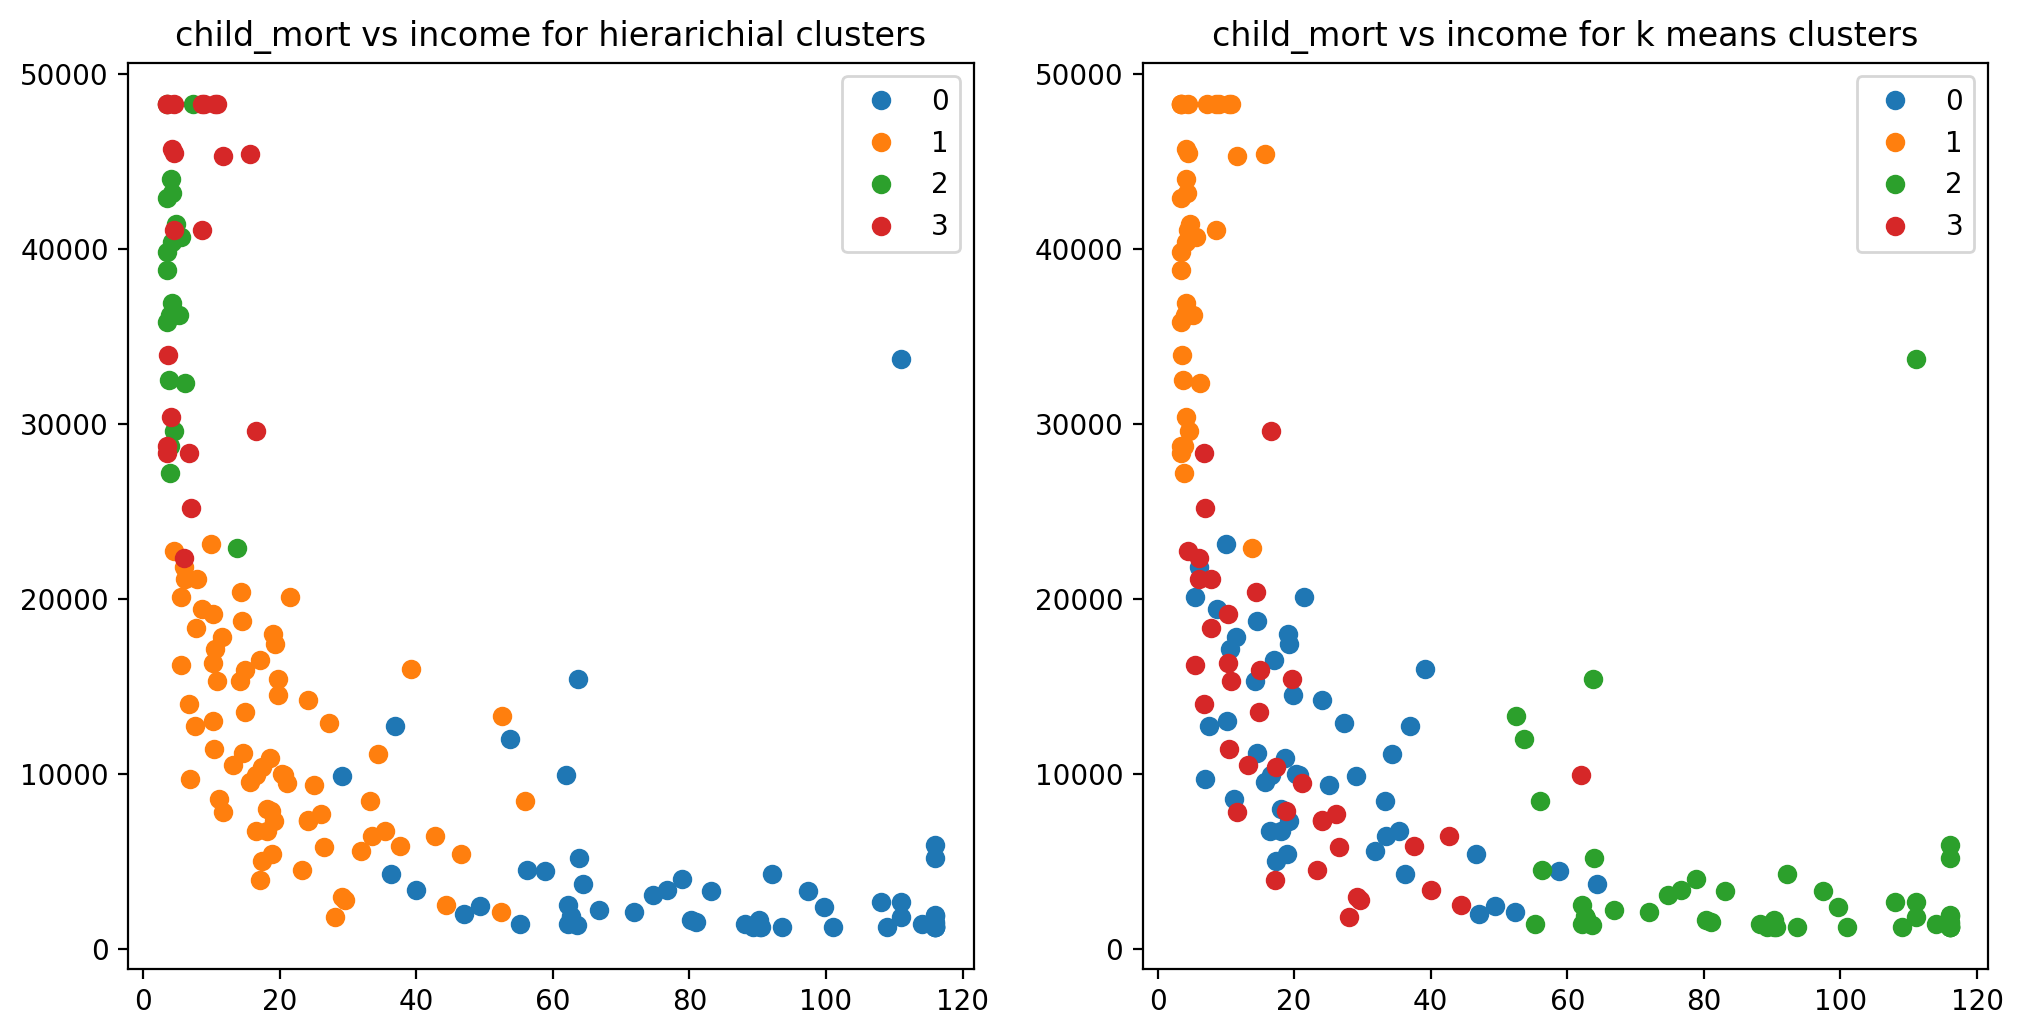

In [257]:
plt.figure(figsize=(12,6),dpi=200)
groups=c_data.groupby("h_cluster_labels")

plt.subplot(1,2,1)
plt.title('child_mort vs income for hierarichial clusters')
for name, group in groups:
    plt.plot(group["child_mort"], group["income"], marker="o", linestyle="", label=name)
plt.legend()
plt.subplot(1,2,2)
plt.title('child_mort vs income for k means clusters')
groups=c_data.groupby("k_cluster_labels")
for name, group in groups:
    plt.plot(group["child_mort"], group["income"], marker="o", linestyle="", label=name)
plt.legend()

plt.show()

- H_cluster
 - cluster 0 - under-Developed (priority)

 - cluster 1 - Developing  

 - Cluster 2 - Developing-developed

 - Cluster 3 - Developed
 
- K_cluster
 - cluster 0 - Developing 

 - cluster 1 - Developed 

 - Cluster 2 - under-Developed (priority)

 - Cluster 3 - Developing-developed


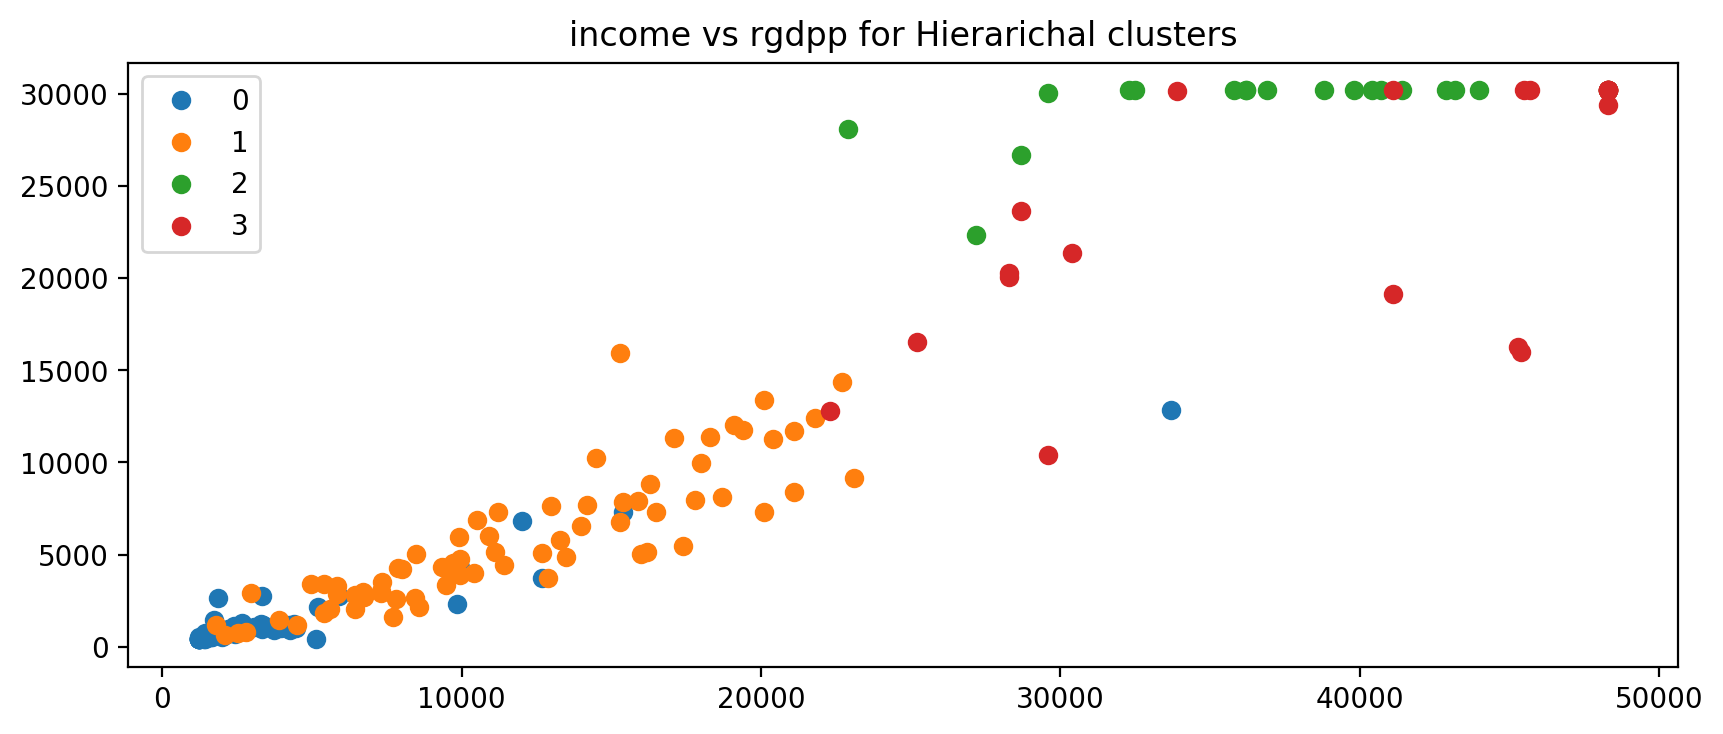

In [272]:
plt.figure(figsize=(10,4),dpi=200)
groups=c_data.groupby("h_cluster_labels")

plt.title('income vs rgdpp for Hierarichal clusters')
for name, group in groups:
    plt.plot(group["income"], group["rgdpp"], marker="o", linestyle="", label=name)
plt.legend()
plt.show()

# The graph shows as the income increaes rgdpp increases

- H_cluster
 - cluster 0 - under-Developed (priority)

 - cluster 1 - Developing  

 - Cluster 2 - Developing-developed

 - Cluster 3 - Developed

In [266]:
c_data.head()

,country,child_mort,exports,health,imports,income,life_expec,total_fer,rgdpp,h_cluster_labels,k_cluster_labels
0,Afghanistan,90.2,12.12,7.58,44.9,1610.0,56.2,5.820,500.7968,0,2
1,Albania,16.6,28.00,6.55,48.6,9930.0,76.3,1.650,3906.3590,1,0
2,Algeria,27.3,38.40,4.17,31.4,12900.0,76.5,2.890,3741.9400,1,0
3,Angola,116.0,62.30,2.85,42.9,5900.0,60.1,5.861,2739.2800,0,2
4,Antigua and Barbuda,10.3,45.50,6.03,58.9,19100.0,76.8,2.130,12024.3200,1,3


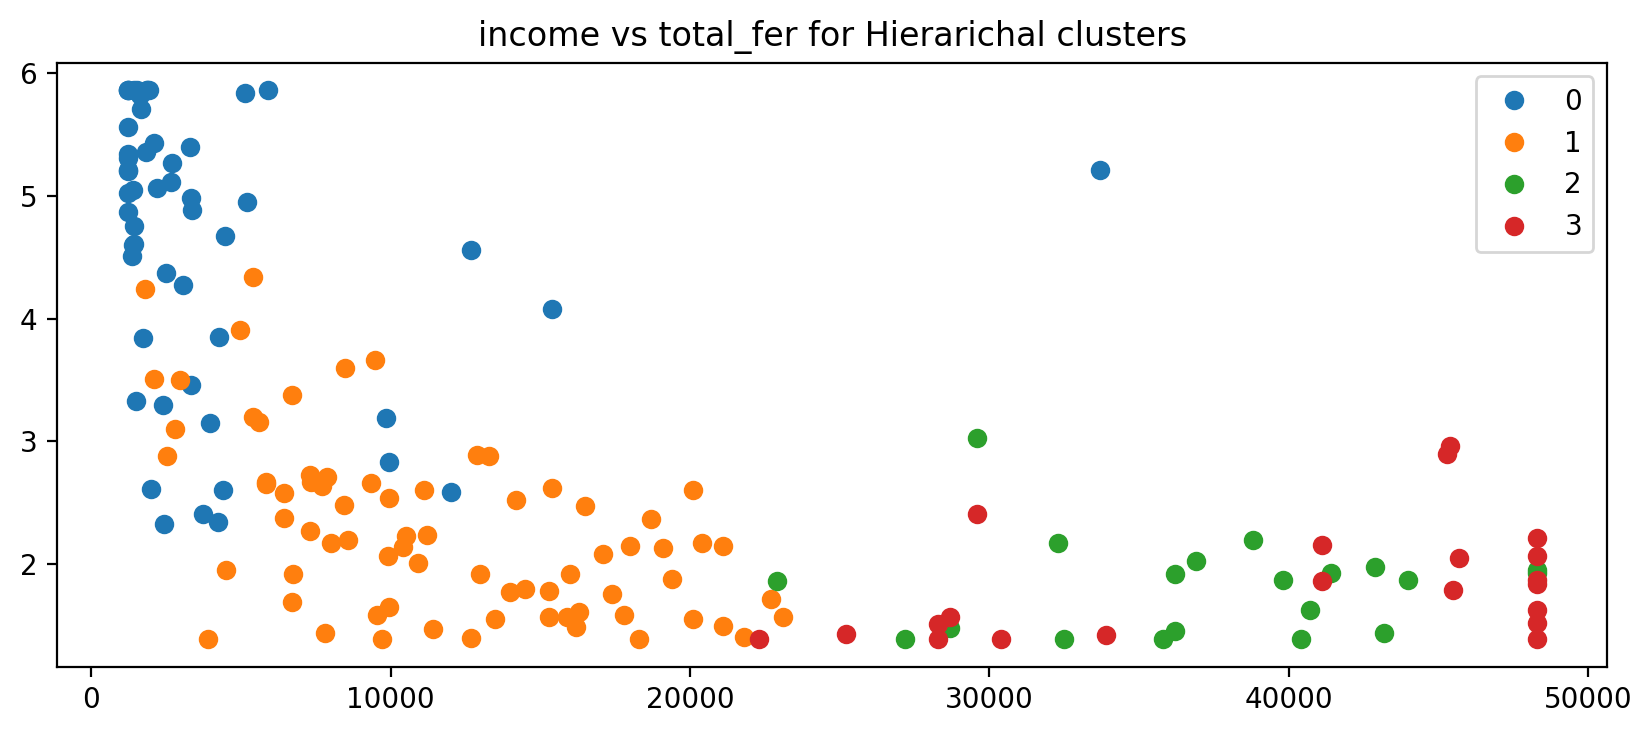

In [273]:
plt.figure(figsize=(10,4),dpi=200)
groups=c_data.groupby("h_cluster_labels")

plt.title('income vs total_fer for Hierarichal clusters')
for name, group in groups:
    plt.plot(group["income"], group["total_fer"], marker="o", linestyle="", label=name)
plt.legend()
plt.show()

# the graph shows as the income increases total_fer decreases

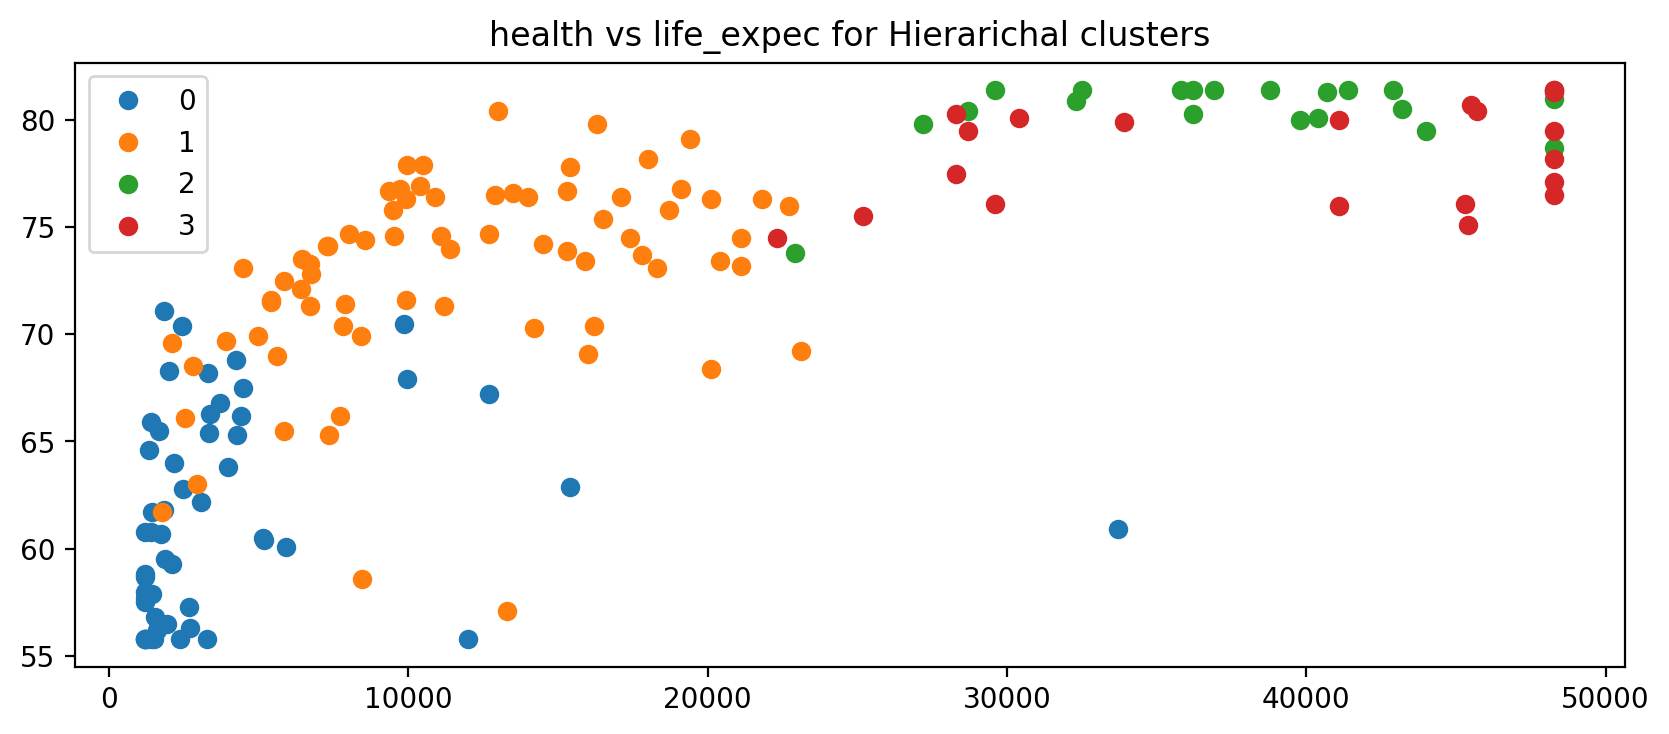

In [274]:
plt.figure(figsize=(10,4),dpi=200)
groups=c_data.groupby("h_cluster_labels")

plt.title('health vs life_expec for Hierarichal clusters')
for name, group in groups:
    plt.plot(group["income"], group["life_expec"], marker="o", linestyle="", label=name)
plt.legend()
plt.show()
# the graph shows life expectancy incrases with amount spending on health

In [286]:
print(len(c_data[(c_data["k_cluster_labels"]==2 ) & (c_data["h_cluster_labels"]==0)]))
countries=c_data[(c_data["k_cluster_labels"]==2 ) & (c_data["h_cluster_labels"]==0)]


44


In [285]:
pd.Series(countries["country"])

0                   Afghanistan
3                        Angola
17                        Benin
25                 Burkina Faso
26                      Burundi
28                     Cameroon
31     Central African Republic
32                         Chad
36                      Comoros
37             Congo, Dem. Rep.
38                  Congo, Rep.
40                Cote d'Ivoire
49            Equatorial Guinea
50                      Eritrea
55                        Gabon
56                       Gambia
59                        Ghana
63                       Guinea
64                Guinea-Bissau
66                        Haiti
80                        Kenya
81                     Kiribati
84                          Lao
87                      Lesotho
88                      Liberia
93                   Madagascar
94                       Malawi
97                         Mali
99                   Mauritania
106                  Mozambique
112                       Niger
113     

#  Listing Final countries

In [288]:
common_countries_final = countries[['country', 'child_mort','income','rgdpp']].sort_values(['child_mort','income'],ascending=[False,True])
common_countries_final
# dataframe with dereasing child mortality rate and increasing income

,country,child_mort,income,rgdpp
31,Central African Republic,116.0,1213.0,437.0354
37,"Congo, Dem. Rep.",116.0,1213.0,410.2491
112,Niger,116.0,1213.0,410.2491
132,Sierra Leone,116.0,1220.0,410.2491
25,Burkina Faso,116.0,1430.0,535.8425
66,Haiti,116.0,1500.0,625.9210
97,Mali,116.0,1870.0,677.0604
32,Chad,116.0,1930.0,839.6817
113,Nigeria,116.0,5150.0,410.2491
3,Angola,116.0,5900.0,2739.2800


In [291]:
final_countries = common_countries_final[(common_countries_final['child_mort'] > 80) &  (common_countries_final['income'] < 1300)]
final_countries = final_countries.reset_index(drop=True)
final_countries

,country,child_mort,income,rgdpp
0,Central African Republic,116.0,1213.0,437.0354
1,"Congo, Dem. Rep.",116.0,1213.0,410.2491
2,Niger,116.0,1213.0,410.2491
3,Sierra Leone,116.0,1220.0,410.2491
4,Guinea,109.0,1213.0,543.6720
5,Mozambique,101.0,1213.0,410.2491
6,Burundi,93.6,1213.0,410.2491
7,Malawi,90.5,1213.0,410.2491
8,Togo,90.3,1213.0,482.2416
9,Liberia,89.3,1213.0,410.2491


######  Countries that are in direst need are

- Central African Republic

- Congo, Dem. Rep.

- Niger	

- Guinea

- Mozambique	

- Sierra Leone

- Burundi	

- Liberia	

- Malawi